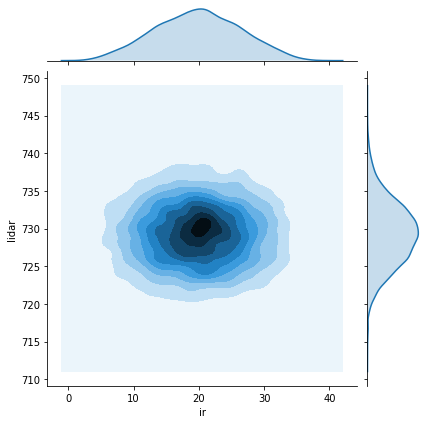

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("sensor_data_700.txt", delimiter = " ", 
                   header = None, names = ("data", "time", "ir", "lidar"))

d = data[(data["time"] < 160000)&(data["time"] >= 120000)] # Choose only from 12:00pm to 4:00pm(16:00)
d = d.loc[:, ["ir", "lidar"]]

sns.jointplot(d["ir"], d["lidar"], d, kind = "kde")
plt.show()

In [2]:
print("光センサの計測器の分散：", d.ir.var())
print("LiDarの計測機の分散：", d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()

a = diff_ir * diff_lidar
print("共分散；", sum(a)/(len(d) - 1))

d.mean()

光センサの計測器の分散： 42.117126367701594
LiDarの計測機の分散： 17.702026469211457
共分散； -0.31677803385436953


ir        19.860247
lidar    729.311958
dtype: float64

In [3]:
d.cov()

,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


In [4]:
from scipy.stats import multivariate_normal

irlidar = multivariate_normal(mean = d.mean().values.T, cov = d.cov().values)

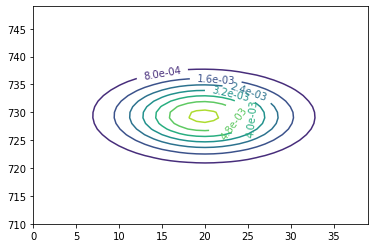

In [5]:
import numpy as np

x, y = np.mgrid[0:40, 710:750]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
cont = plt.contour(x, y, irlidar.pdf(pos))
cont.clabel(fmt = '%1.1e')

plt.show()